In [24]:
import pandas as pd
import  matplotlib.pyplot as plt 
df = pd.read_excel('terc2.xlsx')
df.head()

,WOJ,NAZWA,NAZWA_DOD
0,2,DOLNOŚLĄSKIE,województwo
1,2,bolesławiecki,powiat
2,2,Bolesławiec,gmina miejska
3,2,Bolesławiec,gmina wiejska
4,2,Gromadka,gmina wiejska


In [13]:
df.shape

(4214, 3)

In [ ]:
df['NAZWA_DOD'].unique()

In [6]:
name_to_analysis = ['miasto', 'gmina miejsko-wiejska', 'gmina miejska', 'gmina wiejska', 'obszar wiejski', 'miasto na prawach powiatu',  'miasto stołeczne, na prawach powiatu', 'gmina miejska, miasto stołeczne']
df[df['NAZWA_DOD'].isin(name_to_analysis)]

,WOJ,NAZWA,NAZWA_DOD
2,2,Bolesławiec,gmina miejska
3,2,Bolesławiec,gmina wiejska
4,2,Gromadka,gmina wiejska
5,2,Nowogrodziec,gmina miejsko-wiejska
6,2,Nowogrodziec,miasto
...,...,...,...
4209,32,Koszalin,gmina miejska
4210,32,Szczecin,miasto na prawach powiatu
4211,32,Szczecin,gmina miejska
4212,32,Świnoujście,miasto na prawach powiatu


In [40]:
len(df[df['NAZWA_DOD'].isin(name_to_analysis)])

3847

In [68]:
cities = df[df['NAZWA_DOD'].isin(name_to_analysis)][['WOJ','NAZWA']].drop_duplicates()
dictionary_results = {i:{} for i in df[df['NAZWA_DOD']=='województwo']['WOJ'].values}

for index, city in cities.iterrows():
    province_nr = city.WOJ
#     province = df[df['NAZWA_DOD']=='województwo'].NAZWA.values
    for i in range(0,len(city.NAZWA)-1):
        if city.NAZWA[i:] in dictionary_results[province_nr].keys():
            dictionary_results[province_nr][city.NAZWA[i:]] += 1
        else:
            dictionary_results[province_nr][city.NAZWA[i:]] = 1

In [69]:
results = df.truncate(before=4214)
results.columns = ['woj', 'slowo', 'cnt']
z = 0

for i in dictionary_results:
    for word in dictionary_results[i]:
        results.loc[z] = [i, word, dictionary_results[i][word]]
        z += 1

In [43]:
import geopandas as gpd
mapa_woj = gpd.read_file('Województwa.shp')
mapa_woj = mapa_woj[['JPT_KOD_JE', "geometry"]]
mapa_woj.head(1)

,JPT_KOD_JE,geometry
0,14,"POLYGON ((20.52760 51.46669, 20.52639 51.46841..."


In [94]:
def plot_endings(wyniki_top_1):
    dane_mapa_woj = pd.merge(mapa_woj, wyniki_top_1, how='left', left_on='JPT_KOD_JE', right_on='WOJ')
    dane_mapa_woj['zero'] = [0 for i in range(len(dane_mapa_woj))]
    dane_mapa_woj = dane_mapa_woj.to_crs(epsg=2180)
    dane_mapa_woj['coords'] = dane_mapa_woj['geometry'].apply(lambda x: x.representative_point().coords[:])
    dane_mapa_woj['coords'] = [coords[0] for coords in dane_mapa_woj['coords']]

    fig, ax = plt.subplots(1, figsize = (8,8))
    dane_mapa_woj.plot(column='zero', ax=ax, cmap='YlOrRd', linewidth=0.8, edgecolor='gray')
    for idx, row in dane_mapa_woj.iterrows():
        plt.annotate(s=row['slowo'], xy=row['coords'],fontsize=20, horizontalalignment='center')
    ax.axis('off')
    ax.set_title('Najpopularniejsze końcówki nazw miejscowości (3)', fontsize=20, color='red')
    plt.show()

In [92]:
wyniki_top_1 = results.sort_values('cnt',ascending = False).groupby('woj').head(1).sort_values(by='woj')
province = df[df['NAZWA_DOD']=='województwo'][['WOJ', 'NAZWA']]
wyniki_top_1 = wyniki_top_1.merge(province, how='left', left_on = 'woj', right_on='WOJ')
wyniki_top_1['WOJ'] = wyniki_top_1.WOJ.apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))

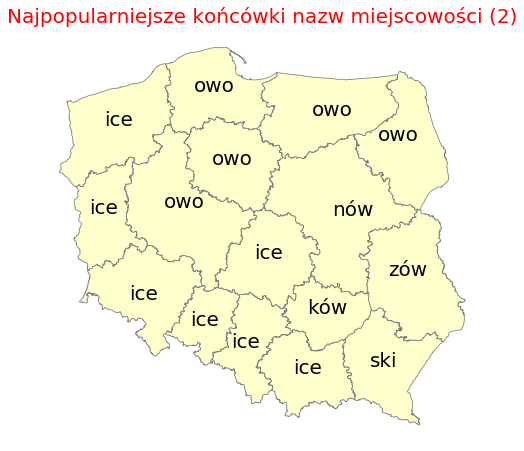

In [93]:
plot_endings(wyniki_top_1)

In [97]:
cities = df[df['NAZWA_DOD'].isin(name_to_analysis)][['WOJ','NAZWA']].drop_duplicates()
dictionary_results = {i:{} for i in df[df['NAZWA_DOD']=='województwo']['WOJ'].values}

for index, city in cities.iterrows():
    province_nr = city.WOJ
#     province = df[df['NAZWA_DOD']=='województwo'].NAZWA.values
    for i in range(0,len(city.NAZWA)-2):
        if city.NAZWA[i:] in dictionary_results[province_nr].keys():
            dictionary_results[province_nr][city.NAZWA[i:]] += 1
        else:
            dictionary_results[province_nr][city.NAZWA[i:]] = 1
            
results = df.truncate(before=4214)
results.columns = ['woj', 'slowo', 'cnt']
z = 0

for i in dictionary_results:
    for word in dictionary_results[i]:
        results.loc[z] = [i, word, dictionary_results[i][word]]
        z += 1
        
mask = (results['slowo'].str.len() == 3)
results = results.loc[mask]
wyniki_top_1 = results.sort_values('cnt',ascending = False).groupby('woj').head(1).sort_values(by='woj')
province = df[df['NAZWA_DOD']=='województwo'][['WOJ', 'NAZWA']]
results_top_1 = wyniki_top_1.merge(province, how='left', left_on = 'woj', right_on='WOJ')
results_top_1['WOJ'] = results_top_1.WOJ.apply(lambda x: '0'+str(x) if len(str(x)) == 1 else str(x))

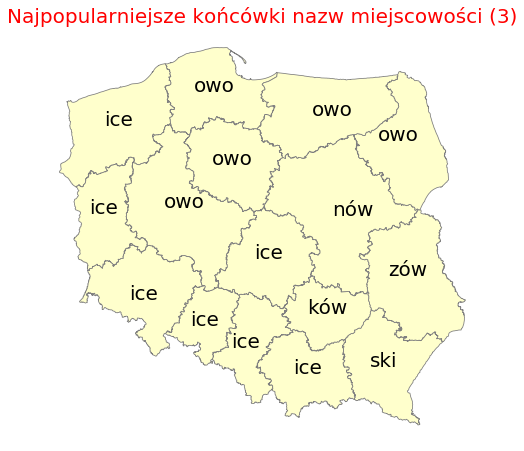

In [98]:
plot_endings(results_top_1)